<a href="https://colab.research.google.com/github/nisrinous/PaperDAA-sourcecode/blob/master/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selection Sort Sorted 1000 Elements in 0.12370538711547852 s
Selection Sort Sorted 2000 Elements in 0.9085257053375244 s
Selection Sort Sorted 3000 Elements in 1.8460335731506348 s
Selection Sort Sorted 4000 Elements in 2.0227608680725098 s
Selection Sort Sorted 5000 Elements in 3.1728649139404297 s
Selection Sort Sorted 6000 Elements in 4.571649551391602 s
Selection Sort Sorted Elements in 12.670767784118652 s
Insertion Sort Sorted 1000 Elements in 0.10174822807312012 s
Insertion Sort Sorted 2000 Elements in 0.42481088638305664 s
Insertion Sort Sorted 3000 Elements in 0.950953483581543 s
Insertion Sort Sorted 4000 Elements in 1.7329933643341064 s
Insertion Sort Sorted 5000 Elements in 2.674396514892578 s
Insertion Sort Sorted 6000 Elements in 3.801269054412842 s
Insertion Sort Sorted Elements in 9.704206943511963 s
Bubble Sort Sorted 1000 Elements in 0.23392844200134277 s
Bubble Sort Sorted 2000 Elements in 0.9332921504974365 s
Bubble Sort Sorted 3000 Elements in 2.1012425422668457 s


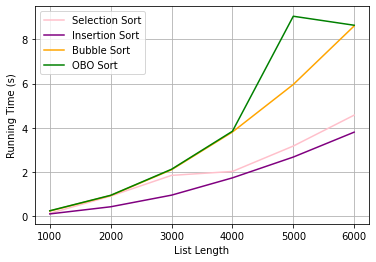

In [4]:
import time
time.clock = time.time

import numpy as np
import matplotlib.pyplot as plt

## Selection Sort 
## Sumber: 
## https://gist.github.com/AananthV/89fdb34f1b3261f1c109c90197fb86e4
def selectionSort(alist):

   for i in range(len(alist)):

      # Find the minimum element in remaining
       minPosition = i

       for j in range(i+1, len(alist)):
           if alist[minPosition] > alist[j]:
               minPosition = j

       # Swap the found minimum element with minPosition
       temp = alist[i]
       alist[i] = alist[minPosition]
       alist[minPosition] = temp

## Insertion Sort 
## Sumber: 
## https://gist.github.com/AananthV/89fdb34f1b3261f1c109c90197fb86e4

def insertionSort(arr):

    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):

        key = arr[i]

        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key

## Bubble Sort 
## Sumber:
## https://www.geeksforgeeks.org/python-program-for-bubble-sort/
def bubbleSort(arr):
    n = len(arr)
    # optimize code, so if the array is already sorted, it doesn't need
    # to go through the entire process
    swapped = False
    # Traverse through all array elements
    for i in range(n-1):
        # range(n) also work but outer loop will
        # repeat one time more than needed.
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j + 1]:
                swapped = True
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
         
        if not swapped:
            # if we haven't needed to make a single swap, we
            # can just exit the main loop.
            return

## OBO Sort 
def OBO(arr):
  left = 0
  right = len(arr)-1
  pointer = 0
  if arr[left] <= arr[left+1]:
    left+=1
    if check(arr) == -1:
      return arr
  else:
    pointer = 0

  for i in range(pointer,right):
    for j in range(i,right):
      if arr[i] >= arr[j+1]:
        # swapping arr[i] with arr[j+1]
        temp = arr[i]
        arr[i] = arr[j+1]
        arr[j+1] = temp
  return arr

def check(arr):
  left = 0
  right = len(arr)-1
  for i in range(left,right):
    if arr[i] > arr[i+1]:
      left = i
      pointer = left
      for k in range(i-1,right):
        if arr[i-1] > arr[k+1]:
          pointer = 0
      return pointer
  return -1

## Main #################################

sorts = [
    {
        "name": "Selection Sort",
        "sort": lambda arr: selectionSort(arr),
        "color": "pink"
    },
    {
        "name": "Insertion Sort",
        "sort": lambda arr: insertionSort(arr),
        "color": "purple"
    },
    {
        "name": "Bubble Sort",
        "sort": lambda arr: bubbleSort(arr),
        "color": "orange"
    },
    {
        "name": "OBO Sort",
        "sort": lambda arr: OBO(arr),
        "color": "green"
    }
]

elements = np.array([i*1000 for i in range(1, 7)])

plt.xlabel('List Length')
plt.ylabel('Running Time (s)')

for sort in sorts:
    times = list()
    start_all = time.clock()
    for i in range(1, 7):
        a = np.random.randint(1000, size = i * 1000)
        start = time.clock()
        sort["sort"](a)
        end = time.clock()
        times.append(end - start)

        print(sort["name"], "Sorted", i*1000, "Elements in", end - start, "s")
    end_all = time.clock()
    print(sort["name"], "Sorted Elements in", end_all - start_all, "s")

    plt.plot(elements, times, label = sort["name"], color = sort["color"])

plt.grid()
plt.legend()
plt.show()

######################################### 